### Data Exploration
#### Steps during data exploration:
- Import datasets saved in csv format in Pycharm .
- Import relevant libraries for later data exploration.
- Observe the head (first 5 rows normally) of the data set to see if any cleaning needs to be done, such as dropna in preparation of relevant calcs next.
- Intermediate exploratory data analysis, such as basic summary stats based on each data sources,countplot based on certain dimensions, merge both data sources.

In [205]:
#import relevant libraries for later data exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, median, mode, stdev
%matplotlib inline

In [206]:
# Data exploration
svcg_data = pd.read_csv(
    '/Users/tinawang/Downloads/PycharmProjects/pythonProject/FirstCapstonePythonProject/Freddie_Mac_downloaded_historical_data/unprocessed_consolidated_historical_data_svcg_file.csv',
    delimiter=",", header=None,
    index_col=False,
    names=["Loan_Sequence_Number", "Monthly_Reporting_Period",
           "Current_Actual_UPB", "Current_Loan_Delinquency_Status",
           "Loan_Age", "Remaining_Months_For_Legal_Maturity",
           "Repurchase_Flag", "Modification_Flag",
           "Zero_Balance_Code", "Zero_Balance_Effective_Date",
           "Current_Interest_Rate", "Current_Deferred_UPB",
           "Due_Date_of_Last_Paid_Installment", "MI_Recoveries",
           "Net_Sales_Proceeds", "Non_MI_Recoveries",
           "Expenses", "Legal_Costs",
           "Maintenance_And_Preservation_Costs", "Taxes_And_Insurance",
           "Miscellaneous_Expenses", "Actual_Loss_Calculation",
           "Modification_Cost", "Step_Modification_Flag",
           "Deferred_Payment_Plan", "Estimated_Loan_to_Value",
           "Zero_Balance_Removal_UPB", "Delinquent_Accrued_Interest",
           "Delinquency_Due_to_Disaster", "Borrower_Assistance_Status_Code"])

print("Shape of the initial servicing file", svcg_data.shape)

/Users/tinawang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,7,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Shape of the initial servicing file (24925762, 30)


In [11]:
print(svcg_data.head())

  Loan_Sequence_Number  Monthly_Reporting_Period  Current_Actual_UPB  \
0         F19Q40000001                    201912             70000.0   
1         F19Q40000001                    202001             69000.0   
2         F19Q40000001                    202002             69000.0   
3         F19Q40000001                    202003             68000.0   
4         F19Q40000001                    202004             68000.0   

  Current_Loan_Delinquency_Status  Loan_Age  \
0                               0         0   
1                               0         1   
2                               0         2   
3                               0         3   
4                               0         4   

   Remaining_Months_For_Legal_Maturity Repurchase_Flag Modification_Flag  \
0                                  120             NaN               NaN   
1                                  119             NaN               NaN   
2                                  118             NaN  

In [53]:
# to display all the columns and first 5 rows
pd.set_option("display.max_columns", None)
svcg_data.head()

,Loan_Sequence_Number,Monthly_Reporting_Period,Current_Actual_UPB,Current_Loan_Delinquency_Status,Loan_Age,Remaining_Months_For_Legal_Maturity,Repurchase_Flag,Modification_Flag,Zero_Balance_Code,Zero_Balance_Effective_Date,Current_Interest_Rate,Current_Deferred_UPB,Due_Date_of_Last_Paid_Installment,MI_Recoveries,Net_Sales_Proceeds,Non_MI_Recoveries,Expenses,Legal_Costs,Maintenance_And_Preservation_Costs,Taxes_And_Insurance,Miscellaneous_Expenses,Actual_Loss_Calculation,Modification_Cost,Step_Modification_Flag,Deferred_Payment_Plan,Estimated_Loan_to_Value,Zero_Balance_Removal_UPB,Delinquent_Accrued_Interest,Delinquency_Due_to_Disaster,Borrower_Assistance_Status_Code
0,F19Q40000001,201912,70000.0,0,0,120,NaN,NaN,NaN,NaN,3.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN
1,F19Q40000001,202001,69000.0,0,1,119,NaN,NaN,NaN,NaN,3.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN
2,F19Q40000001,202002,69000.0,0,2,118,NaN,NaN,NaN,NaN,3.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN
3,F19Q40000001,202003,68000.0,0,3,117,NaN,NaN,NaN,NaN,3.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN
4,F19Q40000001,202004,68000.0,0,4,116,NaN,NaN,NaN,NaN,3.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN


In [14]:
#When cleaning data we will sometimes need to deal with NaNs (Not a Number values). 
# Step 1: search for columns that have missing values
nans_indices = svcg_data.columns[svcg_data.isna().any()].tolist()
print(nans_indices)

['Repurchase_Flag', 'Modification_Flag', 'Zero_Balance_Code', 'Zero_Balance_Effective_Date', 'Due_Date_of_Last_Paid_Installment', 'MI_Recoveries', 'Net_Sales_Proceeds', 'Non_MI_Recoveries', 'Expenses', 'Legal_Costs', 'Maintenance_And_Preservation_Costs', 'Taxes_And_Insurance', 'Miscellaneous_Expenses', 'Actual_Loss_Calculation', 'Modification_Cost', 'Step_Modification_Flag', 'Deferred_Payment_Plan', 'Estimated_Loan_to_Value', 'Zero_Balance_Removal_UPB', 'Delinquent_Accrued_Interest', 'Delinquency_Due_to_Disaster', 'Borrower_Assistance_Status_Code']


In [ ]:
# From the above, we can see that there are lots of NaNs for the many data fields.So we need to fill NaN values 


In [91]:
# unique loan count
loan_count = len(svcg_data['Loan_Sequence_Number'].unique())
loan_count
1686100

1686049

In [167]:
# to get a sense of the data type for each field.
svcg_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24925762 entries, 0 to 24925761
Data columns (total 30 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Loan_Sequence_Number                 object 
 1   Monthly_Reporting_Period             int64  
 2   Current_Actual_UPB                   float64
 3   Current_Loan_Delinquency_Status      object 
 4   Loan_Age                             int64  
 5   Remaining_Months_For_Legal_Maturity  int64  
 6   Repurchase_Flag                      object 
 7   Modification_Flag                    object 
 8   Zero_Balance_Code                    float64
 9   Zero_Balance_Effective_Date          float64
 10  Current_Interest_Rate                float64
 11  Current_Deferred_UPB                 float64
 12  Due_Date_of_Last_Paid_Installment    float64
 13  MI_Recoveries                        float64
 14  Net_Sales_Proceeds                   float64
 15  Non_MI_Recoveries             

In [176]:
# basic summary stats based on the servicing data from 2019 to 2020.
avg_Current_Actual_UPB = round(svcg_data['Current_Actual_UPB'].mean(),2)
avg_Current_Deferred_UPB = round(svcg_data['Current_Deferred_UPB'].mean(),2)
avg_Loan_Age = round(svcg_data['Loan_Age'].mean(),2)
median_Loan_Age = svcg_data['Loan_Age'].median()
avg_Estimated_Loan_to_Value = round(svcg_data['Estimated_Loan_to_Value'].mean())
median_Estimated_Loan_to_Value = round(svcg_data['Estimated_Loan_to_Value'].median(),2)
avg_Expenses = round(svcg_data['Expenses'].mean(),2)
avg_Legal_Costs = round(svcg_data['Legal_Costs'].mean(),2)
avg_Maintenance_And_Preservation_Costs = round(svcg_data['Maintenance_And_Preservation_Costs'].mean(),2)
avg_Taxes_And_Insurance = round(svcg_data['Taxes_And_Insurance'].mean(),2)
avg_Miscellaneous_Expenses = round(svcg_data['Miscellaneous_Expenses'].mean(),2)
avg_Modification_Cost = round(svcg_data['Modification_Cost'].mean(),2)
avg_Zero_Balance_Removal_UPB = round(svcg_data['Zero_Balance_Removal_UPB'].mean(),2)
avg_Delinquent_Accrued_Interest = round(svcg_data['Delinquent_Accrued_Interest'].mean(),2)
avg_Actual_Loss_Calculation = round(svcg_data['Actual_Loss_Calculation'].mean(),2)

print(os.linesep.join(
     ['Basic Summary stats based on 2019 and 2020 servicing data:',
      '',
      'Average Current_Actual_UPB($): '+ str(avg_Current_Actual_UPB),
      'Average Current_Deferred_UPB($): '+ str(avg_Current_Deferred_UPB),
      'Average Loan_Age: '+ str(avg_Loan_Age),
      'Median Loan_Age: '+ str(median_Loan_Age),
      'Average Estimated_Loan_to_Value(%): '+ str(avg_Estimated_Loan_to_Value), 
      'Median Estimated_Loan_to_Value(%): '+ str(median_Estimated_Loan_to_Value),
      'Average Expenses($): '+ str(avg_Expenses),
      'Average Legal_Costs($): '+ str(avg_Legal_Costs), 
      'Average Maintenance_And_Preservation_Costs($): '+ str(avg_Maintenance_And_Preservation_Costs),
      'Average Taxes_And_Insurance($): '+ str(avg_Taxes_And_Insurance),
      'Average Miscellaneous_Expenses($): '+ str(avg_Miscellaneous_Expenses),
      'Average Modification_Cost($): '+ str(avg_Modification_Cost),
      'Average Zero_Balance_Removal_UPB($): '+ str(avg_Zero_Balance_Removal_UPB),
      'Average Delinquent_Accrued_Interest($): '+ str(avg_Delinquent_Accrued_Interest),
      'Average Actual_Loss_Calculation($): '+ str(avg_Actual_Loss_Calculation),
                      ])
     )

# print("Average Estimated_Loan_to_Value:"svcg_data['Estimated_Loan_to_Value'].mean())

Basic Summary stats based on 2019 and 2020 servicing data:

Average Current_Actual_UPB($): 235319.94
Average Current_Deferred_UPB($): 34.63
Average Loan_Age: 7.55
Median Loan_Age: 7.0
Average Estimated_Loan_to_Value(%): 70
Median Estimated_Loan_to_Value(%): 74.0
Average Expenses($): -6235.73
Average Legal_Costs($): -1763.85
Average Maintenance_And_Preservation_Costs($): -771.3
Average Taxes_And_Insurance($): -2158.08
Average Miscellaneous_Expenses($): -1542.5
Average Modification_Cost($): 81.99
Average Zero_Balance_Removal_UPB($): 292776.92
Average Delinquent_Accrued_Interest($): 7655.16
Average Actual_Loss_Calculation($): -11136.82


In [168]:
upb_by_month=svcg_data.groupby('Monthly_Reporting_Period')['Current_Actual_UPB'].sum()
upb_by_month

Monthly_Reporting_Period
201902    1.574568e+10
201903    3.485374e+10
201904    6.056440e+10
201905    8.893351e+10
201906    1.204906e+11
201907    1.527955e+11
201908    1.901633e+11
201909    2.283516e+11
201910    2.690426e+11
201911    3.204701e+11
201912    3.585049e+11
202001    3.978192e+11
202002    3.953746e+11
202003    3.865760e+11
202004    3.737147e+11
202005    3.617724e+11
202006    3.476319e+11
202007    3.326930e+11
202008    3.174899e+11
202009    3.013033e+11
202010    2.849906e+11
202011    2.707718e+11
202012    2.554756e+11
Name: Current_Actual_UPB, dtype: float64

In [51]:
# Total UPB by monthly reporting period.
upb_by_month=svcg_data.groupby('Monthly_Reporting_Period')['Current_Actual_UPB'].sum()
upb_by_month

Monthly_Reporting_Period
201902    1.574568e+10
201903    3.485374e+10
201904    6.056440e+10
201905    8.893351e+10
201906    1.204906e+11
201907    1.527955e+11
201908    1.901633e+11
201909    2.283516e+11
201910    2.690426e+11
201911    3.204701e+11
201912    3.585049e+11
202001    3.978192e+11
202002    3.953746e+11
202003    3.865760e+11
202004    3.737147e+11
202005    3.617724e+11
202006    3.476319e+11
202007    3.326930e+11
202008    3.174899e+11
202009    3.013033e+11
202010    2.849906e+11
202011    2.707718e+11
202012    2.554756e+11
Name: Current_Actual_UPB, dtype: float64

Text(0.5, 1.0, 'Loan Count by Monthly Reporting Period')

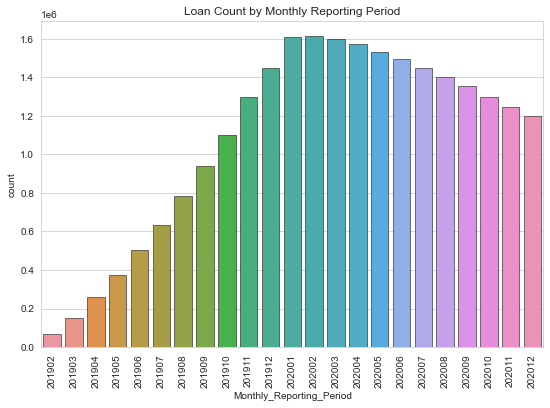

In [204]:
# generate a bar chart to see the loan count by Monthly Reporting Period.
sns.set_style('whitegrid')
plt.figure(figsize=(9,6))
ax=sns.countplot(data=svcg_data,
                x='Monthly_Reporting_Period',
                edgecolor=(0,0,0),
                linewidth=0.5
                )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90) #rotate the xlabel to avoid being overlapped by each other.
plt.title('Loan Count by Monthly Reporting Period')

Text(0.5, 1.0, 'Loan Count by Loan Age')

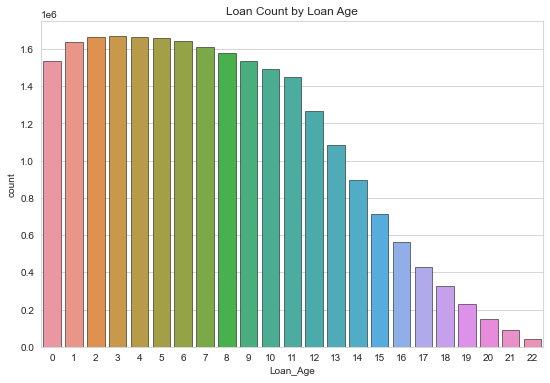

In [201]:
# generate a bar chart to see the loan count by Loan Age.
sns.set_style('whitegrid')
plt.figure(figsize=(9,6))
ax=sns.countplot(data=svcg_data,
                x='Loan_Age',
                edgecolor=(0,0,0),
                linewidth=0.5
                )
plt.title('Loan Count by Loan Age')

In [79]:
# let's look at the origination data
orig_data = pd.read_csv(
    "/Users/tinawang/Downloads/PycharmProjects/pythonProject/FirstCapstonePythonProject/Freddie_Mac_downloaded_historical_data/unprocessed_consolidated_historical_data_orig_file.csv",
    delimiter=",", header=None,
    index_col=False,
    names=["Credit_Score", "First_Payment_Date",
           "First_Time_Homebuyer_Flag", "Maturity_Date",
           "MSA", "Mortgage_Insurance_Percentage",
           "Number_Of_Units", "Occupancy_Status",
           "Original_CLTV", "Original_DTI_Ratio",
           "Original_UPB", "Original_LTV",
           "Original_Interest_Rate", "Channel",
           "PPM_Flag", "Product_Type",
           "Property_State", "Property_Type",
           "Postal_Code", "Loan_Sequence_Number",
           "Loan_Purpose", "Original_Loan_Term",
           "Number_Of_Borrowers", "Seller_Name",
           "Service_Name", "Super_Conforming_Flag",
           "Pre_HARP_Loan_Sequence_Number",
           "Program_Indicator", "HARP_Indicator",
           "Property_Valuation_Method", "Interest_Only_Indicator"])

print(orig_data.shape)

/Users/tinawang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(1686100, 31)


In [110]:
# unique loan count
unique_loan_count=len(orig_data['Loan_Sequence_Number'].unique())
unique_loan_count

1686100

In [80]:
# print out the first 5 rows of the origination data
print(orig_data.head())

   Credit_Score  First_Payment_Date First_Time_Homebuyer_Flag  Maturity_Date  \
0           778              202001                         9         202912   
1           769              201912                         9         204911   
2           814              201912                         9         204911   
3           729              201912                         Y         204911   
4           751              202002                         9         205001   

       MSA Mortgage_Insurance_Percentage  Number_Of_Units Occupancy_Status  \
0      NaN                             0                1                I   
1  39100.0                             0                2                P   
2      NaN                             0                1                S   
3      NaN                            35                1                P   
4  33460.0                             0                2                I   

   Original_CLTV  Original_DTI_Ratio  Original_UPB

In [81]:
# to display all the columns and first 5 rows
pd.set_option("display.max_columns", None)
orig_data.head()

,Credit_Score,First_Payment_Date,First_Time_Homebuyer_Flag,Maturity_Date,MSA,Mortgage_Insurance_Percentage,Number_Of_Units,Occupancy_Status,Original_CLTV,Original_DTI_Ratio,Original_UPB,Original_LTV,Original_Interest_Rate,Channel,PPM_Flag,Product_Type,Property_State,Property_Type,Postal_Code,Loan_Sequence_Number,Loan_Purpose,Original_Loan_Term,Number_Of_Borrowers,Seller_Name,Service_Name,Super_Conforming_Flag,Pre_HARP_Loan_Sequence_Number,Program_Indicator,HARP_Indicator,Property_Valuation_Method,Interest_Only_Indicator
0,778,202001,9,202912,NaN,0,1,I,58,43,70000,58,3.625,R,N,FRM,WY,SF,82400,F19Q40000001,N,120,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
1,769,201912,9,204911,39100.0,0,2,P,44,48,148000,44,4.000,R,N,FRM,NY,SF,12500,F19Q40000002,N,360,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
2,814,201912,9,204911,NaN,0,1,S,72,20,450000,72,3.625,R,N,FRM,CO,SF,81200,F19Q40000003,N,360,1,Other sellers,U.S. BANK N.A.,NaN,NaN,9,NaN,2,N
3,729,201912,Y,204911,NaN,35,1,P,97,45,259000,97,3.250,R,N,FRM,CO,SF,81200,F19Q40000004,P,360,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
4,751,202002,9,205001,33460.0,0,2,I,75,30,195000,75,4.500,R,N,FRM,WI,SF,54000,F19Q40000005,N,360,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N


In [82]:
#When cleaning data we will sometimes need to deal with NaNs (Not a Number values). 
# Step 1: search for columns that have missing values
nans_indices = orig_data.columns[orig_data.isna().any()].tolist()
print(nans_indices)

['MSA', 'Super_Conforming_Flag', 'Pre_HARP_Loan_Sequence_Number', 'Program_Indicator', 'HARP_Indicator', 'Property_Valuation_Method', 'Interest_Only_Indicator']


In [166]:
# to get a sense of the data type for each field.
orig_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686100 entries, 0 to 1686099
Data columns (total 31 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Credit_Score                   1686100 non-null  int64  
 1   First_Payment_Date             1686100 non-null  int64  
 2   First_Time_Homebuyer_Flag      1686100 non-null  object 
 3   Maturity_Date                  1686100 non-null  int64  
 4   MSA                            1527913 non-null  float64
 5   Mortgage_Insurance_Percentage  1686100 non-null  object 
 6   Number_Of_Units                1686100 non-null  int64  
 7   Occupancy_Status               1686100 non-null  object 
 8   Original_CLTV                  1686100 non-null  int64  
 9   Original_DTI_Ratio             1686100 non-null  int64  
 10  Original_UPB                   1686100 non-null  int64  
 11  Original_LTV                   1686100 non-null  int64  
 12  Original_Inter

In [183]:
# basic summary stats of the origination data(each record is unique)
avg_credit_score= round(orig_data['Credit_Score'].mean())
avg_orig_UPB=round(orig_data['Original_UPB'].mean(),2)
sum_orig_UPB=orig_data['Original_UPB'].sum()
avg_orig_cltv=round(orig_data['Original_CLTV'].mean(),2)
avg_orig_ltv=round(orig_data['Original_LTV'].mean(),2)
avg_orig_dti=round(orig_data['Original_DTI_Ratio'].mean(),2)
avg_orig_int_rate=round(orig_data['Original_Interest_Rate'].mean(),2)
avg_orig_loan_term=round(orig_data['Original_Loan_Term'].mean(),0)
#avg_orig_insurance_percentage=round(int(orig_data['Mortgage_Insurance_Percentage']).mean(),2),

print(os.linesep.join(
    ['Basic Summary stats based on 2019 and 2020 Origination data:',
     '',
     'Average Credit_Score: '+ str(avg_credit_score),
     'Average Original_UPB($): '+ str(avg_orig_UPB), 
     'Total Original_UPB($): '+ str(sum_orig_UPB),
     'Average Original_CLTV(%): '+ str(avg_orig_cltv),
     'Average Original_LTV(%): '+ str(avg_orig_ltv),
     'Average Original_DTI_Ratio(%): '+ str(avg_orig_int_rate),
     'Average Original_Loan_Term: '+ str(avg_orig_loan_term)
     #'Average Mortgage_Insurance_Percentage(%): '+ str(avg_orig_insurance_percentage)
                      ])
     )

Basic Summary stats based on 2019 and 2020 Origination data:

Average Credit_Score: 754
Average Original_UPB($): 255079.18
Total Original_UPB($): 430089000000
Average Original_CLTV(%): 75.5
Average Original_LTV(%): 75.32
Average Original_DTI_Ratio(%): 4.15
Average Original_Loan_Term: 330.0


In [106]:
# returns the count of all unique values in the given index in descending order without any null values using value_counts() function.
loan_count = orig_data['First_Time_Homebuyer_Flag'].value_counts(ascending=True)
loan_count

Y    361879
N    424766
9    899455
Name: First_Time_Homebuyer_Flag, dtype: int64

In [107]:
loan_Count_by_property_type = orig_data['Property_Type'].value_counts(ascending=False)
loan_Count_by_property_type

SF    1064234
PU     469488
CO     142544
MH       7132
CP       2702
Name: Property_Type, dtype: int64

In [120]:
orig_data['Loan_Purpose'].unique()

array(['N', 'P', 'C'], dtype=object)

In [119]:
orig_data['Product_Type'].unique()

array(['FRM'], dtype=object)

Text(0.5, 1.0, 'Loan Count by Property Type')

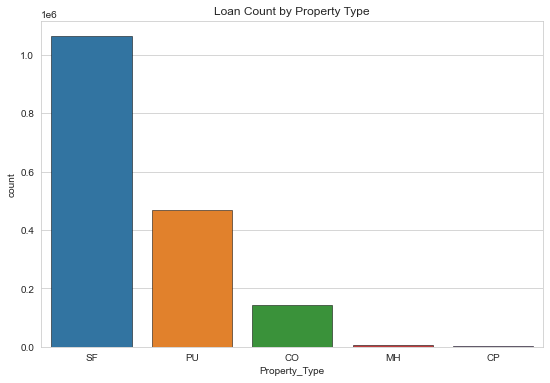

In [185]:
# generate a bar chart to see the loan count by Property Type.
sns.set_style('whitegrid')
plt.figure(figsize=(9,6))
ax=sns.countplot(data=orig_data,
                x='Property_Type',
                # hue='Loan_Purpose',
                edgecolor=(0,0,0),
                linewidth=0.5
                )
plt.title('Loan Count by Property Type')

Text(0.5, 1.0, 'Loan Count by Loan Purpose')

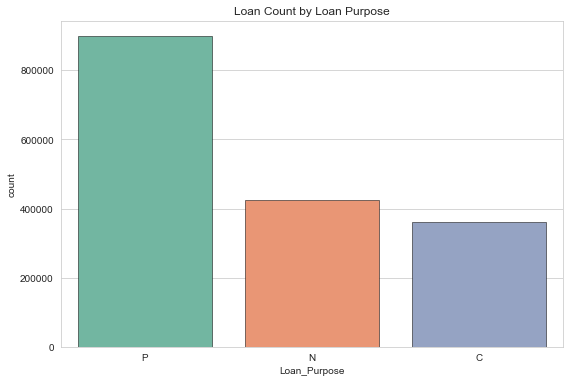

In [137]:
# generate a bar chart to see the loan count by Loan Purpose in descending order.
order_count = orig_data['Loan_Purpose'].value_counts(ascending=False).index
sns.set_style('whitegrid')
plt.figure(figsize=(9,6))
ax=sns.countplot(data=orig_data,
                x='Loan_Purpose',
                palette="Set2",
                order=order_count,
                edgecolor=(0,0,0),
                linewidth=0.5
                )
plt.title('Loan Count by Loan Purpose')
# plt.legend(list(orig_data['Loan_Purpose'].unique()))

Text(0.5, 1.0, 'Loan Count by Channel')

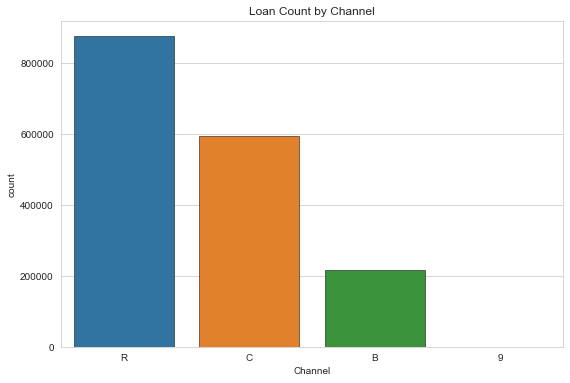

In [187]:
# generate a bar chart to see the loan count by Channel.
sns.set_style('whitegrid')
plt.figure(figsize=(9,6))
ax=sns.countplot(data=orig_data,
                x='Channel',
                order=orig_data['Channel'].value_counts(ascending=False).index,
                edgecolor=(0,0,0),
                linewidth=0.5
                )
plt.title('Loan Count by Channel')

Text(0.5, 1.0, 'Loan Count by Number Of Borrowers')

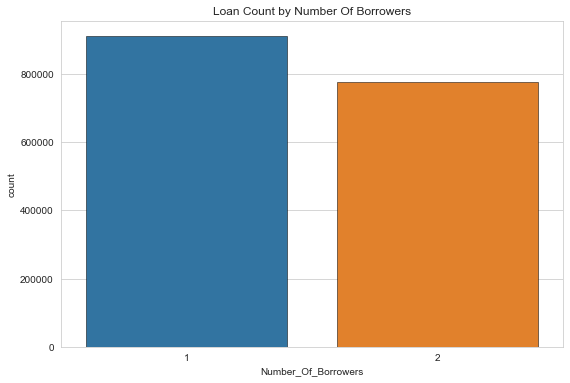

In [199]:
# generate a bar chart to see the loan count by Number_Of_Borrowers.
sns.set_style('whitegrid')
plt.figure(figsize=(9,6))
ax=sns.countplot(data=orig_data,
                x='Number_Of_Borrowers',
                order=orig_data['Number_Of_Borrowers'].value_counts(ascending=False).index,
                edgecolor=(0,0,0),
                linewidth=0.5
                )
plt.title('Loan Count by Number Of Borrowers')

Text(0.5, 1.0, 'Loan Count by Number Of Units')

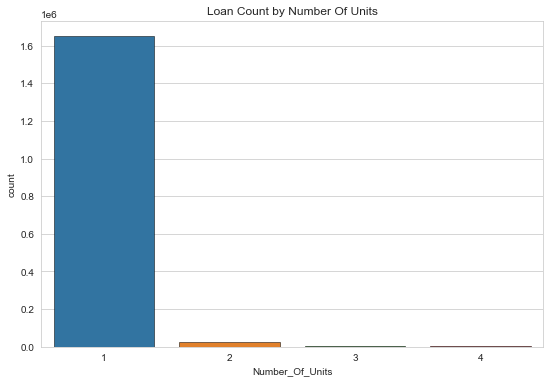

In [198]:
# generate a bar chart to see the loan count by Number_Of_Units.
sns.set_style('whitegrid')
plt.figure(figsize=(9,6))
ax=sns.countplot(data=orig_data,
                x='Number_Of_Units',
                order=orig_data['Number_Of_Units'].value_counts(ascending=False).index,
                edgecolor=(0,0,0),
                linewidth=0.5
                )
plt.title('Loan Count by Number Of Units')

Text(0.5, 1.0, 'Loan Count by First Time Homebuyer Flag')

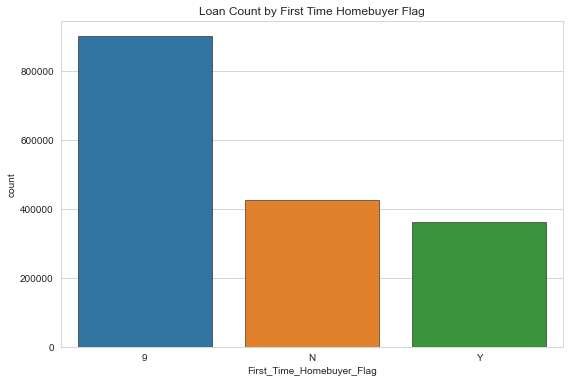

In [195]:
# generate a bar chart to see the loan count by First_Time_Homebuyer_Flag.
sns.set_style('whitegrid')
plt.figure(figsize=(9,6))
ax=sns.countplot(data=orig_data,
                x='First_Time_Homebuyer_Flag',
                order=orig_data['First_Time_Homebuyer_Flag'].value_counts(ascending=False).index,
                edgecolor=(0,0,0),
                linewidth=0.5
                )
plt.title('Loan Count by First Time Homebuyer Flag')

Text(0.5, 1.0, 'Loan Count by Occupancy Status')

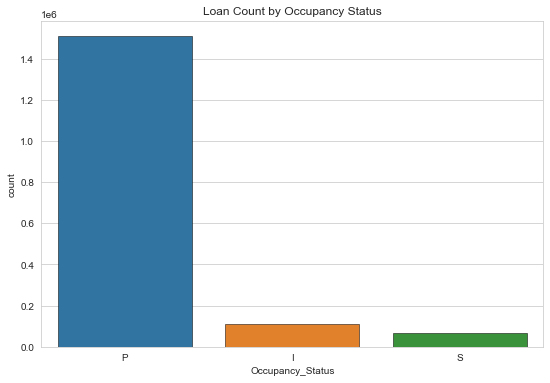

In [197]:
# generate a bar chart to see the loan count by Occupancy Status.
sns.set_style('whitegrid')
plt.figure(figsize=(9,6))
ax=sns.countplot(data=orig_data,
                x='Occupancy_Status',
                order=orig_data['Occupancy_Status'].value_counts(ascending=False).index,
                edgecolor=(0,0,0),
                linewidth=0.5
                )
plt.title('Loan Count by Occupancy Status')

Text(0.5, 1.0, 'Loan Count by Service Name')

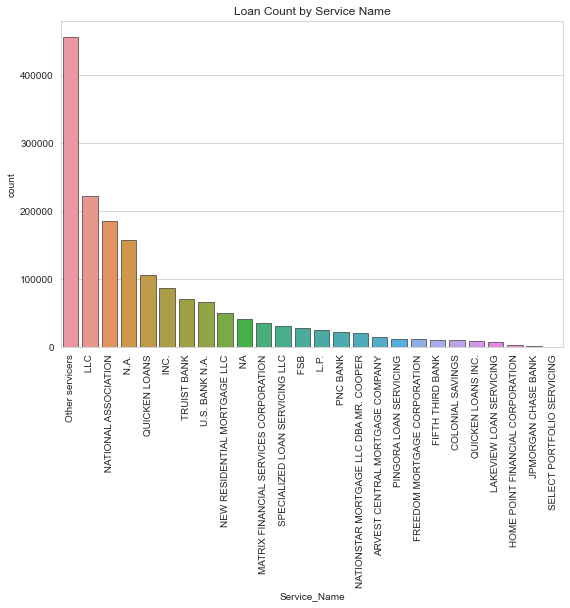

In [192]:
# generate a bar chart to see the loan count by Servicer_Name.
sns.set_style('whitegrid')
plt.figure(figsize=(9,6))
ax=sns.countplot(data=orig_data,
                x='Service_Name',
                order=orig_data['Service_Name'].value_counts(ascending=False).index,
                edgecolor=(0,0,0),
                linewidth=0.5
                )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90) #rotate the xlabel to avoid being overlapped by each other.
plt.title('Loan Count by Service Name')

In [143]:
# perform an inner join based on the Loan_Sequence_Number.
left_merged_data = pd.merge(svcg_data, orig_data, how='left', on=["Loan_Sequence_Number"])
left_merged_data.head()

,Loan_Sequence_Number,Monthly_Reporting_Period,Current_Actual_UPB,Current_Loan_Delinquency_Status,Loan_Age,Remaining_Months_For_Legal_Maturity,Repurchase_Flag,Modification_Flag,Zero_Balance_Code,Zero_Balance_Effective_Date,Current_Interest_Rate,Current_Deferred_UPB,Due_Date_of_Last_Paid_Installment,MI_Recoveries,Net_Sales_Proceeds,Non_MI_Recoveries,Expenses,Legal_Costs,Maintenance_And_Preservation_Costs,Taxes_And_Insurance,Miscellaneous_Expenses,Actual_Loss_Calculation,Modification_Cost,Step_Modification_Flag,Deferred_Payment_Plan,Estimated_Loan_to_Value,Zero_Balance_Removal_UPB,Delinquent_Accrued_Interest,Delinquency_Due_to_Disaster,Borrower_Assistance_Status_Code,Credit_Score,First_Payment_Date,First_Time_Homebuyer_Flag,Maturity_Date,MSA,Mortgage_Insurance_Percentage,Number_Of_Units,Occupancy_Status,Original_CLTV,Original_DTI_Ratio,Original_UPB,Original_LTV,Original_Interest_Rate,Channel,PPM_Flag,Product_Type,Property_State,Property_Type,Postal_Code,Loan_Purpose,Original_Loan_Term,Number_Of_Borrowers,Seller_Name,Service_Name,Super_Conforming_Flag,Pre_HARP_Loan_Sequence_Number,Program_Indicator,HARP_Indicator,Property_Valuation_Method,Interest_Only_Indicator
0,F19Q40000001,201912,70000.0,0,0,120,NaN,NaN,NaN,NaN,3.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,778.0,202001.0,9,202912.0,NaN,0,1.0,I,58.0,43.0,70000.0,58.0,3.625,R,N,FRM,WY,SF,82400.0,N,120.0,2.0,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
1,F19Q40000001,202001,69000.0,0,1,119,NaN,NaN,NaN,NaN,3.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,778.0,202001.0,9,202912.0,NaN,0,1.0,I,58.0,43.0,70000.0,58.0,3.625,R,N,FRM,WY,SF,82400.0,N,120.0,2.0,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
2,F19Q40000001,202002,69000.0,0,2,118,NaN,NaN,NaN,NaN,3.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,778.0,202001.0,9,202912.0,NaN,0,1.0,I,58.0,43.0,70000.0,58.0,3.625,R,N,FRM,WY,SF,82400.0,N,120.0,2.0,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
3,F19Q40000001,202003,68000.0,0,3,117,NaN,NaN,NaN,NaN,3.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,778.0,202001.0,9,202912.0,NaN,0,1.0,I,58.0,43.0,70000.0,58.0,3.625,R,N,FRM,WY,SF,82400.0,N,120.0,2.0,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
4,F19Q40000001,202004,68000.0,0,4,116,NaN,NaN,NaN,NaN,3.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,778.0,202001.0,9,202912.0,NaN,0,1.0,I,58.0,43.0,70000.0,58.0,3.625,R,N,FRM,WY,SF,82400.0,N,120.0,2.0,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N


In [144]:
left_merged_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24925762 entries, 0 to 24925761
Data columns (total 60 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Loan_Sequence_Number                 object 
 1   Monthly_Reporting_Period             int64  
 2   Current_Actual_UPB                   float64
 3   Current_Loan_Delinquency_Status      object 
 4   Loan_Age                             int64  
 5   Remaining_Months_For_Legal_Maturity  int64  
 6   Repurchase_Flag                      object 
 7   Modification_Flag                    object 
 8   Zero_Balance_Code                    float64
 9   Zero_Balance_Effective_Date          float64
 10  Current_Interest_Rate                float64
 11  Current_Deferred_UPB                 float64
 12  Due_Date_of_Last_Paid_Installment    float64
 13  MI_Recoveries                        float64
 14  Net_Sales_Proceeds                   float64
 15  Non_MI_Recoveries             

In [145]:
left_merged_data.shape

(24925762, 60)

In [147]:
#unique loan count of the left merged table
len(left_merged_data.Loan_Sequence_Number.unique())

1686049

In [158]:
# removing empty values and then check the unique values of Occupancy_Status
left_merged_data.dropna(subset=['Occupancy_Status'], inplace=True)
left_merged_data["Occupancy_Status"].unique()

array(['I', 'P', 'S'], dtype=object)